# Python pour les SHS - Des statistiques descriptives aux traitements avancés

Séance pratique plutôt orientée sciences sociales. La fin aborde des usages plus techniques, non abordés pendant le cours (manque de temps)

## Objectif 

De nombreuses enquêtes par questionnaires sont disponibles. Dans le cas d'une collaboration sur la perception de la science en France, il est intéressant de réanalyser des données déjà existantes. 

Cela amène à réaliser les différentes opérations d'une analyse de données :

- Charger les données et les nettoyer
- Recoder et sélectionner
- Décrire les données et les visualiser
- Utiliser des modèles plus avancées

Données sur le Github : https://github.com/pyshs/Formation-unil/blob/main/Data/fr.cdsp.ddi.sav

- Nous allons faire certaines étapes, vous pouvez aller plus loin en intégrant plus de variables
- Dans la vraie vie il y a tout une phase d'essais, d'erreurs, de suppression, etc.
- L'organisation de ce document ne suit pas exactement un document final, avec l'idée qu'il vaut mieux au fur et à mesure regrouper les blocs déjà faits
- Un processus de formalisation (des fonctions, etc.) se fait progressivement des usages
- Comme toujours il y a plusieurs manières de faire les mêmes traitements

## Exploration de données

Première étape, charger et parcourir

Attention, on utilise beaucoup de bibliothèques différentes : pensez à les installer avant de les importer

### Charger des données SPSS de l'enquête 2011 avec pyreadstat

In [303]:
import pyreadstat
data2011, meta2011 = pyreadstat.read_sav('./cdsp_science2011/fr.cdsp.ddi.sav')
data2011.shape

(1027, 188)

Quelques remarques : 

- ce sont des données pondérées -> qu'en faire ?
- beaucoup de questions -> il faudra en faire un choix ET l'étape de prise en main des données n'est pas liée à la programmation mais à la problématique

### Définir des fonctions utilitaires

Travailler avec Python permet de facilement se doter des outils dont on a besoin pour des usages spécifiques...

(actuellement, la limite est que beaucoup d'outils même générique ne sont pas encore écrit...)


Par exemple, accéder rapidement :

- aux questions
- aux modalités

In [268]:
def question(v,meta):
    return meta2011.column_names_to_labels[v]

def modalites(v,meta):
    return meta.value_labels[meta.variable_to_label[v]]

In [19]:
question("m_q29_1",meta2011)

'Mot "Science" : Opinions négatives'

In [26]:
modalites("nivet6",meta2011)

{1.0: 'Primaire',
 2.0: 'Intermédiaire',
 3.0: 'Secondaire',
 4.0: 'Supérieur',
 5.0: 'Supérieur médical',
 6.0: 'Supérieur scientifique',
 888.0: 'Ne sait pas'}

### Sélectionner les variables d'intérêt

Toute analyse il faut identifier les variables d'intérêt. Cela passe par la lecture des données.

Variables dépendantes :

- 'q2': 'Intérêt pour la science'
- 'q15': "Apport de la science à l'Homme"

Variables indépendantes :

-  'rs1': 'Sexe du répondant'
-  'rs2': 'Age du répondant'
-  'rs6': 'PCS du répondant',
-  'pcsip': 'Profession du répondant',
- 'rs14': 'Revenus mensuels du foyer du répondant',
-  'degre': 'Degré de connaissance scientifique (recodage en 4 postes du questionnaire auto-administré)',
-  'rs16a': 'Diplôme le plus élevé du répondant',
- 'rs15': 'Intérêt pour la politique',
- 'rs16': "Auto-positionnement sur l'échelle gauche/droite",
- 'rs11a': 'Proximité avec un parti politique',
- 'rs17': 'Religion du répondant',
-  'nivet6': "Niveau d'études du répondant (recodage en 6 postes)",
-  'q1_1': 'Confiance dans : La justice',
 'q1_2': 'Confiance dans : Les médias',
 'q1_3': 'Confiance dans : La police',
 'q1_4': "Confiance dans : L'Assemblée nationale",
 'q1_5': "Confiance dans : L'administration",
 'q1_6': 'Confiance dans : La science',
 'q1_7': 'Confiance dans : Les grandes entreprises',
 'q1_8': 'Confiance dans : Les associations',
 'q1_9': 'Confiance dans : Le Gouvernement',
 'q1_10': 'Confiance dans : Les agences gouvernementales',





### Regarder les données

In [28]:
data2011["rs1"].value_counts()

2.0    534
1.0    493
Name: rs1, dtype: int64

Pas très joli ... et pas de prise en compte de la pondération. 

On peut mettre un peu en forme "à la main"

- mettre les labels
- changer le nom de la variable
- faire un tri à plat ...

In [39]:
import pandas as pd

# Recoder
data2011["sexe"] = data2011["rs1"].replace(modalites("rs1",meta2011))

# Mettre en forme
tableau = pd.DataFrame(data2011["sexe"].value_counts())
tableau["Proportion"] = tableau["sexe"].apply(lambda x : round(100*x/len(data2011),2))
tableau

,sexe,Proportion
Femme,534,52.0
Homme,493,48.0


Ou bien utiliser une bibliothèque qui prend en compte la pondération ...

In [42]:
import pyshs

tableau = pyshs.tri_a_plat(data2011,"sexe","poids1")
tableau

,Effectif redressé,Pourcentage (%)
sexe,,
Femme,538.1,52.4
Homme,488.9,47.6


Visualiser

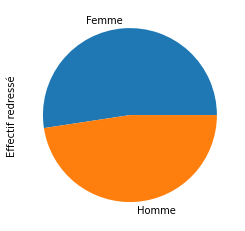

In [71]:
tableau["Effectif redressé"].plot(kind="pie")

Continuer avec les différentes variables

- recoder les différentes variables d'inérêt pour être sur
- recoder les ages
- créer un indicateur de confiance

In [269]:
# Recodage des variables

data2011["interetscience"] = data2011['q2'].replace({1:"Oui",2:"Oui",3:"Non",4:"Non"})
data2011["apportscience"] = data2011['q15'].replace(modalites('q15',meta2011))
data2011["politique"] = data2011["rs16"].replace({1.0: 'Extrême gauche',
 2.0: 'Gauche',
 3.0: 'Gauche',
 4.0: '.Centre',
 5.0: 'Droite',
 6.0: 'Droite',
 7.0: 'Extrême droite',
 888.0: 'Ne sait pas'})

data2011["sexe"] = data2011["rs1"].replace(modalites("rs1",meta2011))
data2011["age_reco"] = pd.cut(data2011['rs2'],[0,35,45,55,65,100],
                labels = ["[18-35[","[35-45[","[45-55[","[55-65[","[65-75]"])
data2011["pcs"] = data2011["pcsip"].replace(modalites("pcsip",meta2011))
data2011["etude"] = data2011["nivet6"].replace(modalites("nivet6",meta2011))
data2011["politique"] = data2011["rs16"].replace({1.0: 'Extrême gauche',
 2.0: 'Gauche',
 3.0: 'Gauche',
 4.0: '.Centre',
 5.0: 'Droite',
 6.0: 'Droite',
 7.0: 'Extrême droite',
 888.0: 'Ne sait pas'})

data2011["confiance"] = data2011[["q1_{}".format(i) for i in range(1,11)]]\
                         .replace({1:1,2:1,3:0,4:0}).fillna(0).sum(axis=1)/10
data2011["confiance_quar"] = pd.qcut(data2011["confiance"],[0,0.25,0.5,0.75,1],["Q1","Q2","Q3","Q4"])

C'est un processus continu, et au fil de l'analyse il est fréquent de modifier

### Commencer à analyser

In [72]:
pyshs.tri_a_plat(data2011,"interetscience","poids1")

,Effectif redressé,Pourcentage (%)
interetscience,,
Non,462.1,45.0
Oui,564.0,55.0


In [74]:
tableau = pyshs.tri_a_plat(data2011,"apportscience","poids1")
tableau

,Effectif redressé,Pourcentage (%)
apportscience,,
A peu près autant de bien que de mal,531.7,52.5
Plus de bien que de mal,420.7,41.5
Plus de mal que de bien,60.4,6.0


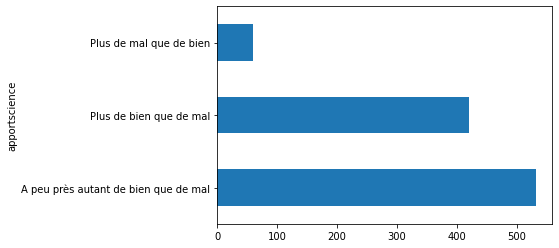

In [76]:
tableau["Effectif redressé"].plot(kind="barh")

Des graphiques un peu plus complexes.

Par exemple la confiance

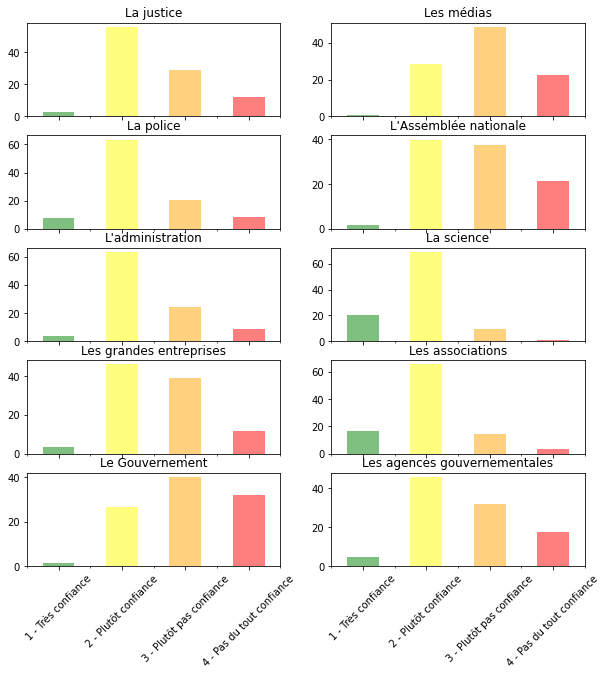

In [261]:
for i in ["q1_{}".format(i) for i in range(1,11)]:
    data2011[i] = data2011[i].replace({1.0: '1 - Très confiance',
 2.0: '2 - Plutôt confiance',
 3.0: '3 - Plutôt pas confiance',
 4.0: '4 - Pas du tout confiance',
 888.0: 'Ne sait pas'})

labels = ["La justice","Les médias","La police","L'Assemblée nationale","L'administration",
"La science","Les grandes entreprises","Les associations","Le Gouvernement","Les agences gouvernementales"]

fix,ax = plt.subplots(5,2,figsize=(10,10),sharex=True)
for i in zip(range(1,11),ax.flat):
    pyshs.tri_a_plat(data2011,"q1_{}".format(i[0]),"poids1")["Pourcentage (%)"].plot(ax=i[1],
                                        kind="bar",rot=45,color=["green","yellow","orange","red"],alpha=0.5)
    i[1].set_title(labels[i[0]-1])
    i[1].set_xlabel("")

### L'analyse bivariée

L'étape souvent ensuite est l'analyse bivariée, qui passe (entre autre) par des tableaux

In [77]:
pd.crosstab(data2011["interetscience"],data2011["sexe"])

sexe,Femme,Homme
interetscience,,
Non,270,196
Oui,264,296


In [81]:
pyshs.tableau_croise(data2011,"sexe","interetscience","poids1")

interetscience,Non,Oui,All
sexe,,,
Femme,272.2 (50.6%),265.8 (49.4%),538.1
Homme,189.8 (38.9%),298.1 (61.1%),487.9
All,462.1,564,1026.0


In [82]:
pyshs.tableau_croise(data2011,"sexe","apportscience","poids1")

apportscience,A peu près autant de bien que de mal,Plus de bien que de mal,Plus de mal que de bien,All
sexe,,,,
Femme,301.0 (57.1%),196.3 (37.2%),30.1 (5.7%),527.4
Homme,230.7 (47.5%),224.4 (46.2%),30.3 (6.2%),485.4
All,531.7,420.7,60.4,1012.8


Faire un test d'hypothèse

Identifier une des bibliothèques qui le fait, par exemple un chi2

In [264]:
from scipy.stats import chi2_contingency

In [270]:
chi2_contingency(pd.crosstab(data2011["sexe"],data2011["apportscience"]))

(8.553196646789049,
 0.013889830526662587,
 2,
 array([[277.25962488, 212.60019743,  34.14017769],
        [258.74037512, 198.39980257,  31.85982231]]))

Savoir quel test faire etc. relève pour le coup des attentes de chaque domaine ...

## Intégrer les variables dans un modèle

Il existe une diversité de modèles qui permettent d'évaluer les effets conjugués de différentes variables dans la détermination d'une variable dépendante

Chaque modèle renvoie à une littérature.

Dans notre cas ici, nous avons comme souvent en SHS des variables catégorielles, on va utiliser une régresssion logistique de la bibliothèque statsmodel

#### Construire le modèle

In [118]:
# Dichotomiser la variable
data2011["apportsciencepositif"] = data2011["apportscience"].apply(lambda x : 1 if x == "Plus de bien que de mal" else 0)


In [122]:
# Chargement de la bibliothèque
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [205]:
# Définition de la formule
f = "apportsciencepositif ~ sexe + age_reco + confiance_quar + etude + politique"

# Création du modèle 
modele = smf.glm(formula=f, data=data2011, family=sm.families.Binomial(), freq_weights=data2011["poids1"])
regression = modele.fit()

Regarder les résultats

In [206]:
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                  Generalized Linear Model Regression Results                   
================================================================================
Dep. Variable:     apportsciencepositif   No. Observations:                  856
Model:                              GLM   Df Residuals:                   835.56
Model Family:                  Binomial   Df Model:                           17
Link Function:                    logit   Scale:                          1.0000
Method:                            IRLS   Log-Likelihood:                -526.65
Date:                  Wed, 28 Apr 2021   Deviance:                       1053.3
Time:                          22:28:51   Pearson chi2:                     852.
No. Iterations:                       4                                         
Covariance Type:              nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -2.1838      0.279     -7.840      0.000      -2.730      -1.638
sexe[T.Homme]                       0.4007      0.153      2.614      0.009       0.100       0.701
age_reco[T.[35-45[]                 0.3666      0.227      1.615      0.106      -0.078       0.812
age_reco[T.[45-55[]                 0.7876      0.247      3.189      0.001       0.303       1.272
age_reco[T.[55-65[]                 0.6302      0.229      2.753      0.006       0.182       1.079
age_reco[T.[65-75]]                 0.8471      0.237      3.574      0.000       0.383       1.312
confiance_quar[T.Q2]                0.4565      0.196      2.324      0.020       0.071       0.842
confiance_quar[T.Q3]                0.9698      0.233      4.158      0.000       0.513       1.427
confiance_quar[T.Q4]                0.9809      0.214      4.584      0.000       0.562       1.400
etude[T.Primaire]                  -0.0753      0.244     -0.308      0.758      -0.554       0.403
etude[T.Secondaire]                 0.9073      0.225      4.024      0.000       0.465       1.349
etude[T.Supérieur]                  1.0396      0.211      4.932      0.000       0.626       1.453
etude[T.Supérieur médical]          0.8142      0.490      1.663      0.096      -0.146       1.774
etude[T.Supérieur scientifique]     1.2163      0.267      4.555      0.000       0.693       1.740
politique[T.Droite]                 0.2892      0.210      1.375      0.169      -0.123       0.701
politique[T.Extrême droite]        -0.5697      0.524     -1.088      0.277      -1.596       0.457
politique[T.Extrême gauche]         0.6729      0.448      1.503      0.133      -0.205       1.550
politique[T.Gauche]                 0.1800      0.181      0.996      0.319      -0.174       0.534
===================================================================================================
"""

#### Calculer une information manquante

In [214]:
def pseudoR2(mod):
    R = 1-mod.deviance/mod.null_deviance
    return round(R,2)

pseudoR2(regression)

0.1

#### Afficher un tableau bien mis en forme

In [208]:
ind_var = {"sexe":"Sexe","age_reco":"Age","confiance_quar":"Confiance","etude":"Niveau d'étude","politique":"Politique"}
pyshs.tableau_reg_logistique(regression,data2011,ind_var,sig=True)

Odds Ratio        p                IC
Variable       Modalité                                                    
.Intercept                                  0.11   0.0***  0.11 [0.07-0.19]
Age            [18-35[                       ref                           
               [35-45[                      1.44    0.106  1.44 [0.92-2.25]
               [45-55[                       2.2  0.001**  2.20 [1.35-3.57]
               [55-65[                      1.88  0.006**  1.88 [1.20-2.94]
               [65-75]                      2.33   0.0***  2.33 [1.47-3.71]
Confiance      Q1                            ref                           
               Q2                           1.58    0.02*  1.58 [1.07-2.32]
               Q3                           2.64   0.0***  2.64 [1.67-4.17]
               Q4                           2.67   0.0***  2.67 [1.75-4.06]
Niveau d'étude Intermédiaire                 ref                           
               Primaire                     0.93    0.758  0.93 [0.57-1.50]
               Secondaire                   2.48   0.0***  2.48 [1.59-3.85]
               Supérieur                    2.83   0.0***  2.83 [1.87-4.27]
               Supérieur médical            2.26    0.096  2.26 [0.86-5.90]
               Supérieur scientifique       3.37   0.0***  3.37 [2.00-5.70]
Politique      .Centre                       ref                           
               Droite                       1.34    0.169  1.34 [0.88-2.02]
               Extrême droite               0.57    0.277  0.57 [0.20-1.58]
               Extrême gauche               1.96    0.133  1.96 [0.81-4.71]
               Gauche                        1.2    0.319  1.20 [0.84-1.71]
Sexe           Femme                         ref                           
               Homme                        1.49  0.009**  1.49 [1.11-2.02]

#### Faire un graphique add hoc

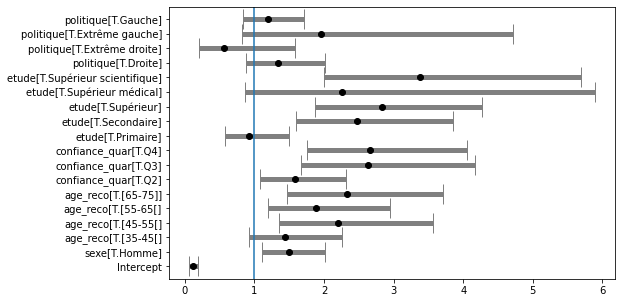

In [271]:
# Construction des données
u = regression.summary2()
u = np.exp(u.tables[1][["Coef.","[0.025","0.975]"]])
u["low"] = u["Coef."]-u["[0.025"]
u["up"] = u["0.975]"]-u["Coef."]

# Création du graphique
fig,ax = plt.subplots(figsize=(8,5))
ax.errorbar( u["Coef."],u.index, xerr=u[["low","up"]].values.T,fmt='o', color='black',
             ecolor='gray', elinewidth=5, capsize=10)
plt.axvline(1)

## Analyse factorielle sur la confiance

#### Matrice de données numériques

In [90]:
X = data2011[["q1_{}".format(i) for i in range(1,11)]].fillna(2.5)
X

,q1_1,q1_2,q1_3,q1_4,q1_5,q1_6,q1_7,q1_8,q1_9,q1_10
0,3.0,4.0,2.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0
1,2.0,3.0,1.0,2.0,2.0,2.0,3.0,3.0,2.0,2.0
2,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.5,2.0
3,2.0,3.0,2.0,3.0,2.0,2.0,3.0,2.0,4.0,2.0
4,2.0,3.0,4.0,4.0,3.0,2.0,4.0,2.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...
1022,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,3.0,3.0
1023,2.0,3.0,2.0,2.0,3.0,2.0,2.0,2.0,3.0,2.0
1024,2.0,3.0,2.0,2.0,2.0,1.0,3.0,3.0,3.0,3.0
1025,2.5,2.0,2.0,2.0,2.5,2.0,2.0,2.0,2.0,2.0


#### Normer les données

In [175]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xr = scaler.fit_transform(X)

#### Faire la projection

In [176]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
Xp = pd.DataFrame(pca.fit_transform(Xr))

#### Regarder le résultat

In [177]:
pca.explained_variance_ratio_

array([0.34376472, 0.11867907, 0.09826595, 0.08365512, 0.07389841,
       0.06751282, 0.06464544, 0.059311  , 0.0479813 , 0.04228617])

Text(0, 0.5, 'Variance expliquée')

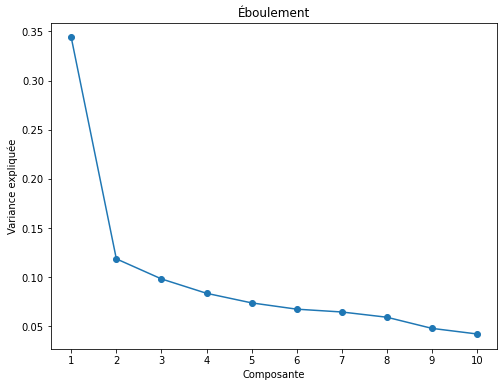

In [215]:
import numpy as np
ind = np.arange(1, 11)
ind
(fig, ax) = plt.subplots(figsize=(8, 6))
ax.plot(ind, pca.explained_variance_ratio_,"o-")
ax.set_title('Éboulement')
ax.set_xticks(ind)
ax.set_xticklabels(ind)
ax.set_xlabel('Composante')
ax.set_ylabel('Variance expliquée')

Forme d'un vecteur

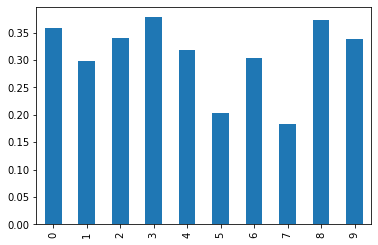

In [178]:
pd.Series(pca.components_[0]).plot(kind="bar")

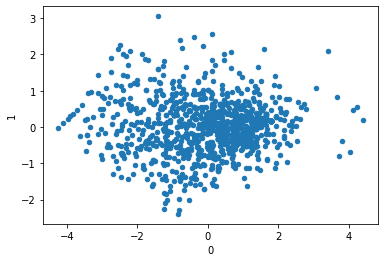

In [116]:
Xp.plot(kind="scatter",x=0,y=1)

(-1.0994713695023444,
 1.0999748271191592,
 -1.0998615404412626,
 1.0998615404412626)

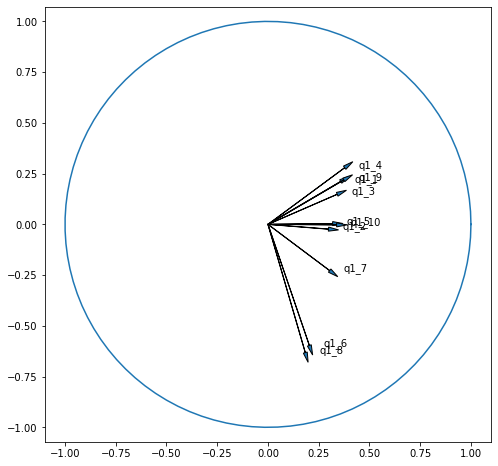

In [172]:
(fig, ax) = plt.subplots(figsize=(8, 8))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,0, 
             pca.components_[0, i],pca.components_[1, i],
             head_width=0.02, head_length=0.05)

    plt.text(pca.components_[0, i] + 0.07,
             pca.components_[1, i],
             X.columns.values[i])

# Ajouter le cercle
an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))
plt.axis('equal')

## Classification (créer des clusters)

Explorer le lien intérêt / définition

- {'m_q29_1': 'Mot "Science" : Opinions négatives',
 'm_q29_2': 'Mot "Science" : L\'avenir / le futur',
 'm_q29_3': 'Mot "Science" : La recherche (chercheurs, laboratoires)',
 'm_q29_4': 'Mot "Science" : Le savoir / la connaissance / l\'intelligence / les études',
 'm_q29_5': 'Mot "Science" : Les expériences, les tests, les essais',
 'm_q29_6': 'Mot "Science" : Les découvertes et inventions',
 'm_q29_7': 'Mot "Science" : Le progrès / les avancées / le développement',
 'm_q29_8': 'Mot "Science" : Les mathématiques',
 'm_q29_9': 'Mot "Science" : La physique',
 'm_q29_10': 'Mot "Science" : La chimie',
 'm_q29_11': 'Mot "Science" : La biologie',
 'm_q29_12': 'Mot "Science" : La génétique',
 'm_q29_13': 'Mot "Science" : L\'anatomie / le corps humain',
 'm_q29_14': 'Mot "Science" : Les sciences humaines / la sociologie',
 'm_q29_15': 'Mot "Science" : La météorologie',
 'm_q29_16': 'Mot "Science" : Les sciences de la terre',
 'm_q29_17': 'Mot "Science" : L\'astronomie',
 'm_q29_18': 'Mot "Science" : La médecine',
 'm_q29_19': 'Mot "Science" : La santé / la longévité',
 'm_q29_20': 'Mot "Science" : La maladie / le cancer',
 'm_q29_21': 'Mot "Science" : Les médicaments / les soins / les traitements',
 'm_q29_22': 'Mot "Science" : L\'environnement',
 'm_q29_23': 'Mot "Science" : Autres citations nature',
 'm_q29_24': 'Mot "Science" : La technologie',
 'm_q29_25': 'Mot "Science" : La technique',
 'm_q29_26': 'Mot "Science" : L\'énergie',
 'm_q29_27': 'Mot "Science" : Le nucléaire / l\'atome',
 'm_q29_28': 'Mot "Science" : Autres citations',
 'm_q29_29': 'Mot "Science" : Ne sait pas'}
 
 
- 'q3_1': "Intérêts : La conquête de l'espace",
 'q3_2': 'Intérêts : La recherche médicale',
 'q3_3': 'Intérêts : Les grandes réalisations techniques',
 'q3_4': 'Intérêts : Les grandes explorations (volcans, océans)',
 'q3_5': 'Intérêts : Les recherches sur la matière',
 'q3_6': 'Intérêts : Les recherches sur la vie',
 'q3_7': "Intérêts : Les recherches sur l'environnement",
 'q3_8': 'Intérêts : Les recherches sur le climat',
 'q3_9': 'Intérêts : Les nouveautés technologiques',
 'q3_10': 'Intérêts : Les recherches sur les énergies nouvelles',
 'q3_11': 'Intérêts : Les risques liés aux découvertes scientifiques',

Première étape de créer un tableau numérique

In [227]:
variables = ["q3_{}".format(i) for i in range(1,12)]
X = data2011[variables]
X = X.replace(modalites("q3_1",meta2011)).fillna("Ne sait pas")
Xd = pd.get_dummies(X)
Xd

,q3_1_Beaucoup,q3_1_Ne sait pas,q3_1_Pas du tout,q3_1_Un peu,q3_2_Beaucoup,q3_2_Ne sait pas,q3_2_Pas du tout,q3_2_Un peu,q3_3_Beaucoup,q3_3_Ne sait pas,...,q3_9_Pas du tout,q3_9_Un peu,q3_10_Beaucoup,q3_10_Ne sait pas,q3_10_Pas du tout,q3_10_Un peu,q3_11_Beaucoup,q3_11_Ne sait pas,q3_11_Pas du tout,q3_11_Un peu
0,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
1,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
2,0,0,0,1,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
3,0,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
1023,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1024,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
1025,0,0,0,1,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0


Classification hiérarchique ascendante

In [229]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

clustering = AgglomerativeClustering(n_clusters=5).fit(Xd)

2    314
0    246
1    214
4    171
3     82
Name: cluster, dtype: int64

Ajout des clusters à nos données

In [ ]:
data2011["cluster"] = clustering.labels_
data2011["cluster"] = data2011["cluster"].apply(str)
data2011["cluster"].value_counts()

Croisements pour regarder la composition de ces clusters

In [232]:
t = {}
for i in variables + ["sexe"]:
    t[i] = pyshs.tableau_croise(data2011, "cluster",i, "poids1").T
pd.concat(t)

cluster                  0              1              2             3  \
q3_1  1.0     42.5 (17.3%)    15.0 (7.0%)  111.7 (35.8%)    1.7 (2.1%)   
      2.0     81.4 (33.2%)   90.6 (42.5%)  147.1 (47.1%)  11.2 (13.9%)   
      3.0    121.2 (49.4%)  107.7 (50.5%)   53.5 (17.1%)  67.9 (84.0%)   
      All            245.1          213.3          312.3          80.8   
q3_2  1.0    196.2 (79.6%)  102.8 (48.2%)  283.7 (90.8%)  34.1 (42.2%)   
      2.0     41.7 (16.9%)  104.7 (49.1%)    27.0 (8.6%)  38.4 (47.5%)   
      3.0       8.5 (3.4%)     5.8 (2.7%)     1.6 (0.5%)   8.3 (10.3%)   
      All            246.4          213.3          312.3          80.8   
q3_3  1.0     45.4 (18.8%)    11.3 (5.4%)  269.7 (86.3%)    3.0 (3.7%)   
      2.0    172.4 (71.4%)  167.3 (79.3%)   38.3 (12.3%)  32.9 (41.1%)   
      3.0      23.8 (9.9%)   32.5 (15.4%)     4.4 (1.4%)  44.2 (55.2%)   
      All            241.6          211.1          312.3            80   
q3_4  1.0     96.1 (39.0%)    19.9 (9.4%)  220.0 (70.6%)    1.2 (1.5%)   
      2.0    105.0 (42.6%)  142.3 (67.3%)   82.7 (26.5%)  23.4 (29.2%)   
      3.0     45.4 (18.4%)   49.2 (23.3%)     9.0 (2.9%)  55.4 (69.2%)   
      All            246.4          211.4          311.7            80   
q3_5  1.0     53.9 (23.6%)     5.8 (2.8%)  178.5 (57.8%)    0.0 (0.0%)   
      2.0    110.6 (48.5%)  106.5 (51.5%)  106.4 (34.5%)  12.1 (15.0%)   
      3.0     63.7 (27.9%)   94.5 (45.7%)    23.7 (7.7%)  68.7 (85.0%)   
      All            228.2          206.8          308.6          80.8   
q3_6  1.0    177.1 (73.8%)   42.4 (20.0%)  280.9 (90.6%)   8.8 (10.9%)   
      2.0     54.2 (22.6%)  147.6 (69.5%)    29.3 (9.4%)  43.7 (54.1%)   
      3.0       8.8 (3.7%)   22.3 (10.5%)     0.0 (0.0%)  28.3 (35.0%)   
      All            240.1          212.3          310.2          80.8   
q3_7  1.0    217.0 (89.2%)    15.5 (7.3%)  296.2 (94.8%)    2.4 (3.0%)   
      2.0      12.6 (5.2%)  195.0 (91.4%)    16.2 (5.2%)  42.8 (53.0%)   
      3.0      13.7 (5.6%)     2.9 (1.4%)     0.0 (0.0%)  35.6 (44.1%)   
      All            243.2          213.3          312.3          80.8   
q3_8  1.0    200.6 (82.4%)    14.6 (6.9%)  289.6 (92.7%)    5.6 (6.9%)   
      2.0     29.4 (12.1%)  182.8 (86.1%)    22.8 (7.3%)  26.3 (32.5%)   
      3.0      13.3 (5.5%)    14.8 (7.0%)     0.0 (0.0%)  48.9 (60.5%)   
      All            243.2          212.2          312.3          80.8   
q3_9  1.0     39.0 (15.8%)    17.7 (8.3%)  265.7 (85.1%)   8.3 (10.3%)   
      2.0    179.4 (72.8%)  155.5 (73.2%)   37.6 (12.0%)  20.8 (25.7%)   
      3.0     28.1 (11.4%)   39.2 (18.5%)     9.0 (2.9%)  51.7 (64.0%)   
      All            246.4          212.5          312.3          80.8   
q3_10 1.0    128.0 (53.2%)   23.4 (11.0%)  304.6 (97.5%)    1.0 (1.2%)   
      2.0    101.0 (41.9%)  176.1 (82.6%)     5.9 (1.9%)  23.8 (29.5%)   
      3.0      11.8 (4.9%)    13.8 (6.5%)     1.8 (0.6%)  56.0 (69.3%)   
      All            240.9          213.3          312.3          80.8   
q3_11 1.0    132.0 (54.4%)   30.3 (14.3%)  257.8 (82.8%)    2.6 (3.2%)   
      2.0     86.3 (35.6%)  164.9 (77.7%)   48.2 (15.5%)  10.7 (13.2%)   
      3.0     24.4 (10.1%)    17.1 (8.1%)     5.4 (1.7%)  67.5 (83.5%)   
      All            242.7          212.3          311.5          80.8   
sexe  Femme  150.9 (61.0%)  127.0 (59.5%)  136.6 (43.7%)  51.5 (63.7%)   
      Homme   96.5 (39.0%)   86.4 (40.5%)  175.7 (56.3%)  29.3 (36.3%)   
      All            247.4          213.3          312.3          80.8   

cluster                  4     All  
q3_1  1.0     34.7 (20.0%)   205.6  
      2.0     96.6 (55.8%)   426.9  
      3.0     41.8 (24.1%)   392.2  
      All            173.2  1024.7  
q3_2  1.0    118.8 (68.6%)   735.6  
      2.0     53.4 (30.8%)   265.2  
      3.0       1.0 (0.6%)    25.2  
      All            173.2    1026  
q3_3  1.0     93.1 (54.2%)   422.4  
      2.0     69.5 (40.4%)   480.4  
      3.0       9.3 (5.4%)   114.1  
   

### Essayer d'analyser les sens donné au terme science

Créer le tableau de données

In [287]:
science = {'m_q29_1': 'Mot "Science" : Opinions négatives',
 'm_q29_2': 'Mot "Science" : L\'avenir / le futur',
 'm_q29_3': 'Mot "Science" : La recherche (chercheurs, laboratoires)',
 'm_q29_4': 'Mot "Science" : Le savoir / la connaissance / l\'intelligence / les études',
 'm_q29_5': 'Mot "Science" : Les expériences, les tests, les essais',
 'm_q29_6': 'Mot "Science" : Les découvertes et inventions',
 'm_q29_7': 'Mot "Science" : Le progrès / les avancées / le développement',
 'm_q29_8': 'Mot "Science" : Les mathématiques',
 'm_q29_9': 'Mot "Science" : La physique',
 'm_q29_10': 'Mot "Science" : La chimie',
 'm_q29_11': 'Mot "Science" : La biologie',
 'm_q29_12': 'Mot "Science" : La génétique',
 'm_q29_13': 'Mot "Science" : L\'anatomie / le corps humain',
 'm_q29_14': 'Mot "Science" : Les sciences humaines / la sociologie',
 'm_q29_15': 'Mot "Science" : La météorologie',
 'm_q29_16': 'Mot "Science" : Les sciences de la terre',
 'm_q29_17': 'Mot "Science" : L\'astronomie',
 'm_q29_18': 'Mot "Science" : La médecine',
 'm_q29_19': 'Mot "Science" : La santé / la longévité',
 'm_q29_20': 'Mot "Science" : La maladie / le cancer',
 'm_q29_21': 'Mot "Science" : Les médicaments / les soins / les traitements',
 'm_q29_22': 'Mot "Science" : L\'environnement',
 'm_q29_23': 'Mot "Science" : Autres citations nature',
 'm_q29_24': 'Mot "Science" : La technologie',
 'm_q29_25': 'Mot "Science" : La technique',
 'm_q29_26': 'Mot "Science" : L\'énergie',
 'm_q29_27': 'Mot "Science" : Le nucléaire / l\'atome',
 'm_q29_28': 'Mot "Science" : Autres citations',
 'm_q29_29': 'Mot "Science" : Ne sait pas'}
science = {i:science[i].replace('Mot "Science" : ','') for i in science}

In [275]:
modalites("m_q29_1",meta2011)

{0.0: 'Non cité', 1.0: 'Cité'}

In [295]:
X = data2011[[i for i in science]]
X.columns = list(science.values())
X = X.replace({1:"Oui",0:"Non"})
X

,Opinions négatives,L'avenir / le futur,"La recherche (chercheurs, laboratoires)",Le savoir / la connaissance / l'intelligence / les études,"Les expériences, les tests, les essais",Les découvertes et inventions,Le progrès / les avancées / le développement,Les mathématiques,La physique,La chimie,...,La maladie / le cancer,Les médicaments / les soins / les traitements,L'environnement,Autres citations nature,La technologie,La technique,L'énergie,Le nucléaire / l'atome,Autres citations,Ne sait pas
0,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,...,Non,Non,Non,Non,Non,Non,Non,Non,Oui,Non
1,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,...,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non
2,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,...,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non
3,Non,Non,Non,Non,Non,Non,Oui,Non,Non,Non,...,Non,Non,Non,Non,Oui,Non,Non,Non,Oui,Non
4,Non,Non,Oui,Non,Non,Non,Non,Non,Non,Non,...,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,Non,Non,Oui,Non,Non,Non,Non,Non,Non,Non,...,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non
1023,Non,Non,Oui,Non,Non,Non,Non,Non,Non,Non,...,Oui,Non,Non,Non,Non,Non,Non,Non,Non,Non
1024,Non,Non,Oui,Non,Non,Non,Non,Non,Non,Non,...,Oui,Non,Non,Non,Oui,Non,Non,Non,Non,Non
1025,Non,Non,Non,Non,Oui,Non,Non,Non,Non,Non,...,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non
